In [1]:
%matplotlib inline

import nltk
from nltk.sentiment import vader
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Users\Brian\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Defining the sentiment analyzer, pulled in from VADER (Valence Aware Dictionary for Sentiment Reasoning)
sia = vader.SentimentIntensityAnalyzer()

# The output is 4 values, the easiest to use is the compound
def vaderSentiment(text):
    return sia.polarity_scores(text)['compound']

# Reads a target text, returns a 1000 data point list to show rising and falling tension
def readSentiment (bookTarget):
    judgedSentiment = []
    gatherTotal = []
    book1N = []
    runningTotal = 0
    count = 0
    # reads a target text, does a simple cleaning looking only at ASCII characters
    book = open (bookTarget, "r", errors = "surrogateescape").read()
    book = ''.join([x for x in book if ord(x) < 128])
    # turns the text into sentence level list
    bookToken = sent_tokenize (book)
    
    # calls the sentiment analyzer on each sentence and records the value between -1 and 1
    for i in bookToken:
        judgedSentiment.append(vaderSentiment(i))
    
    # adds together the sentiment and records the running total into a list
    for i in judgedSentiment:
        runningTotal = runningTotal + i
        gatherTotal.append(runningTotal)
    
    # scales the data to be 1000 data points 
    for i in range (1000):
        book1N.append (gatherTotal[int (count)])
        count = count + (len(gatherTotal)/1000)
        
    return book1N

# using a directory walk function to find text files (or any other type) and returns the list
def fileSearch (starts = '', ends = '', rootDir = 'D:\\Gutenberg\\2006\\rawText'):
    target = []
    for dirName, subdirList, fileList in os.walk(rootDir):

        for fname in fileList:
            if fname.lower().startswith((starts)) & fname.lower().endswith((ends)) :
                target.append (os.path.join(dirName,fname))
    return target
                

In [4]:
# creating a list for a simple example
simple = []

In [5]:
# looking in a folder that has some text files
'''Texts = 
Alice in Wonderland, 
The Adventures of Tom Sawyer,
A Christmas Carol,
The Prince,
Metamorphosis
'''
thing = fileSearch ('','-8.txt', rootDir = 'D:\\Gutenberg\\2006\\rawText')



In [ ]:
for i in thing:
    simple.append (readSentiment(i))

In [9]:
# create a dataframe out of the list of lists, then transpose it for easier graphing
df = pd.DataFrame(simple)
df = df.transpose()
df

,0,1,2,3,4
0,-0.2500,-0.2500,-0.5267,-0.5267,0.0000
1,0.5756,1.5240,-0.5267,-0.7219,0.0000
2,0.5891,0.5645,-0.5267,-0.8586,-0.5267
3,0.6500,-0.8637,-1.5429,-1.8123,-0.2085
4,0.6500,-0.7655,-1.5429,-1.7340,-0.2085
5,0.6500,0.2684,-1.5429,-2.4141,-0.7944
6,1.4774,-0.8245,-1.3406,-1.7275,-0.7944
7,0.9533,-1.3945,-0.9191,-3.0247,-0.4332
8,1.2915,-0.1209,-0.6691,-3.0247,-0.9906
9,1.8622,0.4494,-0.6691,-2.8716,-0.9906


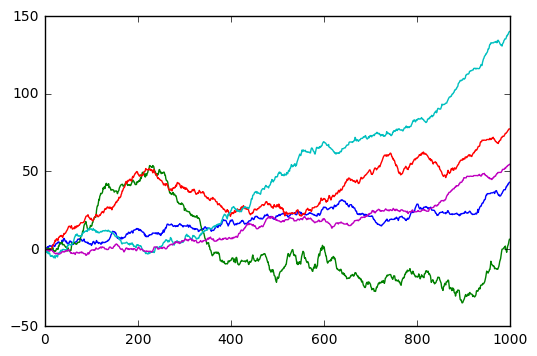

In [10]:
# and then graph it so the numers mean something
plt.plot(df)


In [11]:
vader.SentimentIntensityAnalyzer().polarity_scores("The food is not good.")

{'compound': -0.3412, 'neg': 0.376, 'neu': 0.624, 'pos': 0.0}